# **Analysis of Shark Attacks Data**

In [20]:
import numpy as np
import pandas as pd
import re

In [21]:
attacks_clean = pd.read_csv("output/attacks_clean.csv")
attacks_clean.head()

,Unnamed: 0,Date,Country,Activity
0,0,2018,USA,Water sports
1,1,2018,USA,Others
2,2,2018,USA,Water sports
3,3,2018,AUSTRALIA,Water sports
4,4,2018,MEXICO,Water sports


### **Analysis attacks per year and activity**

In [22]:
# Generating two columns from "Activity" columns 
attacks_clean["Water Sports"] = np.where(attacks_clean["Activity"].isin(["Water sports"]), 1, 0)
attacks_clean["Other activity"] = np.where(attacks_clean["Activity"].isin(["Others"]), 1, 0)

In [23]:
attacks_clean.head()

,Unnamed: 0,Date,Country,Activity,Water Sports,Other activity
0,0,2018,USA,Water sports,1,0
1,1,2018,USA,Others,0,1
2,2,2018,USA,Water sports,1,0
3,3,2018,AUSTRALIA,Water sports,1,0
4,4,2018,MEXICO,Water sports,1,0


#### **Group by "Date"** 
To analyse attacks in which the activity was "Water Sports" or "Others" by year

In [24]:
attacks_clean.groupby("Date").agg({"Water Sports":"sum","Other activity":"sum"}) #.sort_values("Date", ascending=False)

,Water Sports,Other activity
Date,,
1543,1,0
1555,1,0
1580,0,1
1595,0,1
1600,0,1
...,...,...
2015,92,45
2016,84,41
2017,98,33


[]

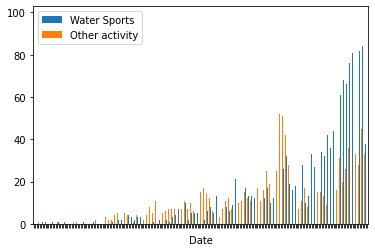

In [25]:
a = attacks_clean.groupby("Date").agg({"Water Sports":"sum","Other activity":"sum"}).plot.bar()
a.set_xticklabels(labels=[]) # Con esto he conseguido quitar las etiquetas para que no se vea tan mal, pero no he conseguido poner las etiquetas que quería
#ticks=[0,105,205,305,405,425,445,465],#"1545","1650","1750","1850","1950","1970","1990","2010"

#### **Categorize by 20 in 20 years** 
To do a better analysis from what years the great increase in attacks begins

In [26]:
años_bins = list(range(1539,2020,20))
años_labels = list(range(1550,2020,20))

In [27]:
attacks_clean["Veintena"] = pd.cut(attacks_clean["Date"],bins=años_bins,labels=años_labels)

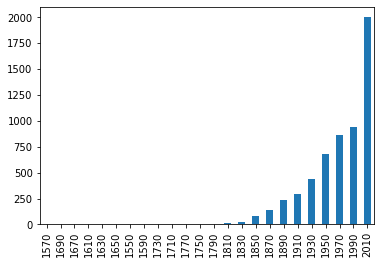

In [28]:
attacks_clean["Veintena"].value_counts().sort_values(ascending=True).plot.bar()

In [29]:
# Filtering the data set by Date. Removing dates before 1900
filter_attacks = attacks_clean.Date >=1900

In [30]:
attacks_clean = attacks_clean[filter_attacks]

In [31]:
attacks_clean

,Unnamed: 0,Date,Country,Activity,Water Sports,Other activity,Veintena
0,0,2018,USA,Water sports,1,0,2010
1,1,2018,USA,Others,0,1,2010
2,2,2018,USA,Water sports,1,0,2010
3,3,2018,AUSTRALIA,Water sports,1,0,2010
4,4,2018,MEXICO,Water sports,1,0,2010
...,...,...,...,...,...,...,...
5735,6295,1906,AUSTRALIA,Others,0,1,1910
5736,6296,1906,AUSTRALIA,Water sports,1,0,1910
5737,6297,1903,AUSTRALIA,Water sports,1,0,1910
5738,6298,1903,AUSTRALIA,Water sports,1,0,1910


#### **Categorize by decades** 
To analysis attacks from 1900 until now

In [32]:
años_bins = list(range(1899,2021,10))
años_labels = list(range(1900,2020,10))
attacks_clean["Decada"] = pd.cut(attacks_clean["Date"],bins=años_bins,labels=años_labels)

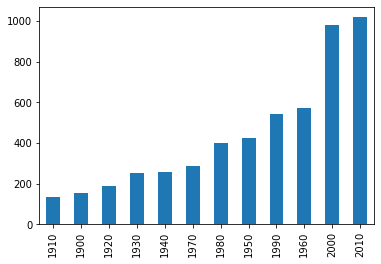

In [33]:
attacks_clean["Decada"].value_counts().sort_values().plot.bar()

#### **Conclusion 1: The number of sharks attacks on humans has increased in last decades.**

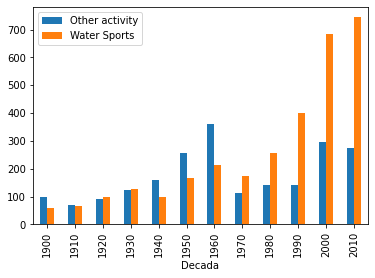

In [34]:
attacks_clean.groupby("Decada").agg({"Other activity":"sum","Water Sports":"sum"}).plot.bar()

#### **Conclusion 2: The number of sharks attacks on humans practising water sports has increased in last years.**

### **Analysis attacks based on countries**

In [35]:
attacks_clean["Country"].value_counts()

USA                       1977
AUSTRALIA                 1092
SOUTH AFRICA               514
PAPUA NEW GUINEA           110
BRAZIL                     100
                          ... 
BAHREIN                      1
BRITISH VIRGIN ISLANDS       1
Seychelles                   1
GULF OF ADEN                 1
NAMIBIA                      1
Name: Country, Length: 180, dtype: int64

In [36]:
#Filtering by the two countries where more than 50% of attacks occurred and Water Sports are very popular
filter_country = (attacks_clean["Country"]=="USA")|(attacks_clean["Country"]=="AUSTRALIA")

In [37]:
attacks_clean = attacks_clean[filter_country]

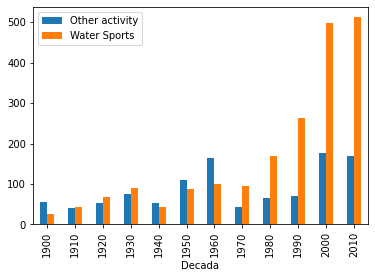

In [38]:
attacks_clean.groupby("Decada").agg({"Other activity":"sum","Water Sports":"sum"}).plot.bar()

#### **Conclusion 3: The number of sharks attacks on humans who practice water sports in countries where these types of sports are very popular has a greater tendency of increase.**